## Alunas
> - Laura Ellen Souza Santos - GEC 1657
> - Letícia Moreira Mendes - GEC 1705
> - Lívia Jakclinne Ramos Moreira - GEC 1731 

# Instalando bibliotecas de Fuzzy e MQTT


In [ ]:
pip install scikit-fuzzy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install paho-mqtt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importando Bibliotecas e Configurando o MQTT Client




In [ ]:
import numpy as np
import skfuzzy as fuzz
import paho.mqtt.client as mqtt
from skfuzzy import control as ctrl
import time
import matplotlib.pyplot as plt 

mqttBroker = "test.mosquitto.org"
client = mqtt.Client("C213_Balestra_Wesley")
client.connect(mqttBroker)

0

# Antecedentes

## Erro


c:\Users\livia\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


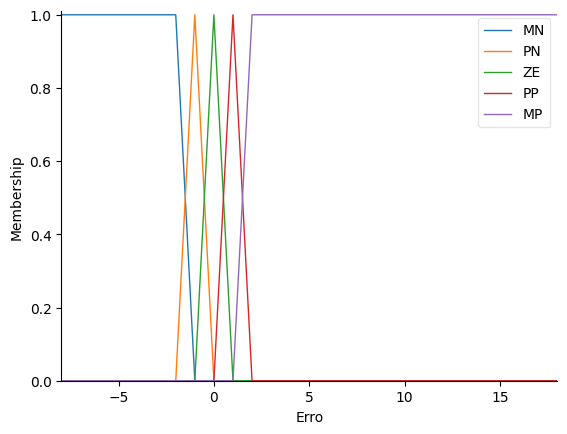

In [ ]:
Erro = ctrl.Antecedent(np.arange(-8, 19, 1), 'Erro')

# Plotando o gráfico
Erro['MN'] = fuzz.trapmf(Erro.universe, [-8, -8, -2,-1])
Erro['PN'] = fuzz.trimf(Erro.universe, [-2,-1,0])
Erro['ZE'] = fuzz.trimf(Erro.universe, [-1, 0, 1])
Erro['PP'] = fuzz.trimf(Erro.universe, [0, 1, 2])
Erro['MP'] = fuzz.trapmf(Erro.universe,[1, 2, 18,18])
Erro.view()

## Variação do Erro


c:\Users\livia\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


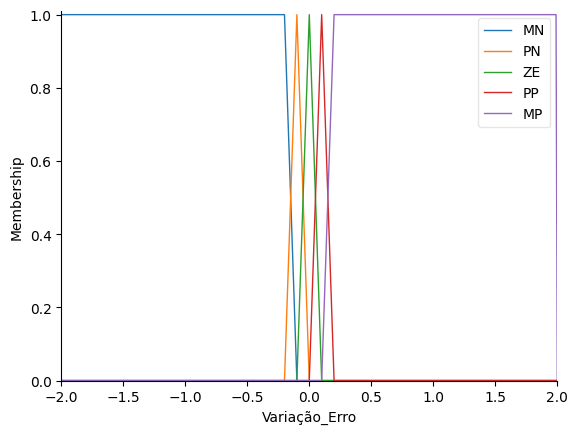

In [ ]:
VariacaoErro = ctrl.Antecedent(np.arange(-2, 2.01, 0.01), 'Variação_Erro')

# Criando o gráfico
VariacaoErro['MN'] = fuzz.trapmf(VariacaoErro.universe, [-2, -2, -0.2,-0.1])
VariacaoErro['PN'] = fuzz.trimf(VariacaoErro.universe, [-0.2,-0.1,0])
VariacaoErro['ZE'] = fuzz.trimf(VariacaoErro.universe, [-0.1, 0, 0.1])
VariacaoErro['PP'] = fuzz.trimf(VariacaoErro.universe, [0, 0.1, 0.2])
VariacaoErro['MP'] = fuzz.trapmf(VariacaoErro.universe,[0.1, 0.2, 2,2])

# You can see how these look with .view()
VariacaoErro.view()


# Consequente


c:\Users\livia\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


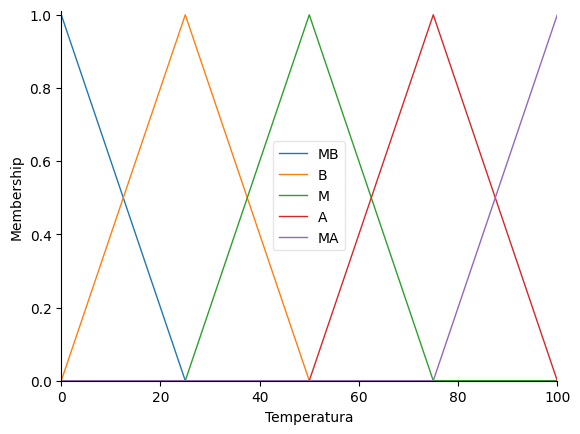

In [ ]:
Temperatura = ctrl.Consequent(np.arange(0, 101, 1), 'Temperatura')

Temperatura['MB'] = fuzz.trimf(Temperatura.universe, [0,0,25])
Temperatura['B'] = fuzz.trimf(Temperatura.universe, [0,25,50])
Temperatura['M'] = fuzz.trimf(Temperatura.universe, [25, 50, 75])
Temperatura['A'] = fuzz.trimf(Temperatura.universe, [50, 75, 100])
Temperatura['MA'] = fuzz.trimf(Temperatura.universe, [75, 100, 100])
Temperatura.view()

# Regras de funcionamento


In [ ]:
# Regras para a 'VariacaoErro' == MN
Regra_1 = ctrl.Rule(Erro['MN']& VariacaoErro['MN'], Temperatura['MA'])
Regra_2 = ctrl.Rule(Erro['PN']& VariacaoErro['MN'], Temperatura['MA'])
Regra_3 = ctrl.Rule(Erro['ZE']& VariacaoErro['MN'], Temperatura['A'])
Regra_4 = ctrl.Rule(Erro['PP']& VariacaoErro['MN'], Temperatura['M'])
Regra_5 = ctrl.Rule(Erro['MP']& VariacaoErro['MN'], Temperatura['M'])

# Regras para a 'VariacaoErro' == PN
Regra_6 = ctrl.Rule(Erro['MN']& VariacaoErro['PN'], Temperatura['MA'])
Regra_7 = ctrl.Rule(Erro['PN']& VariacaoErro['PN'], Temperatura['A'])
Regra_8 = ctrl.Rule(Erro['ZE']& VariacaoErro['PN'], Temperatura['A'])
Regra_9 = ctrl.Rule(Erro['PP']& VariacaoErro['PN'], Temperatura['B'])
Regra_10 = ctrl.Rule(Erro['MP']& VariacaoErro['PN'], Temperatura['B'])

# Regras para a 'VariacaoErro' == ZE
Regra_11 = ctrl.Rule(Erro['MN']& VariacaoErro['ZE'], Temperatura['MA'])
Regra_12 = ctrl.Rule(Erro['PN']& VariacaoErro['ZE'], Temperatura['A'])
Regra_13 = ctrl.Rule(Erro['ZE']& VariacaoErro['ZE'], Temperatura['M'])
Regra_14 = ctrl.Rule(Erro['PP']& VariacaoErro['ZE'], Temperatura['B'])
Regra_15 = ctrl.Rule(Erro['MP']& VariacaoErro['ZE'], Temperatura['MB'])

# Regras para a 'VariacaoErro' == PP
Regra_16 = ctrl.Rule(Erro['MN']& VariacaoErro['PP'], Temperatura['A'])
Regra_17 = ctrl.Rule(Erro['PN']& VariacaoErro['PP'], Temperatura['A'])
Regra_18 = ctrl.Rule(Erro['ZE']& VariacaoErro['PP'], Temperatura['M'])
Regra_19 = ctrl.Rule(Erro['PP']& VariacaoErro['PP'], Temperatura['B'])
Regra_20 = ctrl.Rule(Erro['MP']& VariacaoErro['PP'], Temperatura['MB'])

# Regras para a 'VariacaoErro' == MP
Regra_21 = ctrl.Rule(Erro['MN']& VariacaoErro['MP'], Temperatura['M'])
Regra_22 = ctrl.Rule(Erro['PN']& VariacaoErro['MP'], Temperatura['M'])
Regra_23 = ctrl.Rule(Erro['ZE']& VariacaoErro['MP'], Temperatura['B'])
Regra_24 = ctrl.Rule(Erro['PP']& VariacaoErro['MP'], Temperatura['MB'])
Regra_25 = ctrl.Rule(Erro['MP']& VariacaoErro['MP'], Temperatura['MB'])

In [ ]:
velocidade_ctrl = ctrl.ControlSystem([Regra_1, Regra_2, Regra_3,Regra_4,Regra_5,Regra_6, Regra_7, Regra_8,Regra_9,Regra_10,Regra_11, Regra_12, Regra_13,Regra_14,Regra_15,Regra_16, Regra_17, Regra_18,Regra_19,Regra_20,Regra_21, Regra_22, Regra_23,Regra_24,Regra_25])
controlador = ctrl.ControlSystemSimulation(velocidade_ctrl)

# Entrada de dados

In [28]:
# Entradas de dados para as operações
print('''   CONTROLE DE TEMPERATURA
            [1] - MANTER TEMPERATURA ALTA (-2°C).
            [2] - MANTER TEMPERATURA MÉDIA (-6°C).
            [3] - MANTER TEMPERATURA BAIXA (-8°C).
            [4] - OUTRA TEMPERATURA. ''')
opcao=-50

while(not(opcao >= 1 and opcao <= 4)):

  opcao = int(input('Escolha uma opção: '))

if(opcao == 1):
  setpoint = -2
elif(opcao == 2):
  setpoint = -6
elif(opcao == 3):
  setpoint = -8
elif(opcao == 4):
  setpoint = int(input('Escolha a temperatura de setpoint: '))

temperaturaAtual = float(input('Entre com a temperatura atual: '))

while(temperaturaAtual < -10 or temperaturaAtual > 10):
    print('A temperatura deve estar de -10°C a 10°C')
    temperaturaAtual = float(input('Entre com a temperatura atual: '))


   CONTROLE DE TEMPERATURA
            [1] - MANTER TEMPERATURA ALTA (-2°C).
            [2] - MANTER TEMPERATURA MÉDIA (-6°C).
            [3] - MANTER TEMPERATURA BAIXA (-8°C).
            [4] - OUTRA TEMPERATURA. 


# Saída


In [30]:
print(f'====================== DADOS INSERIDOS ======================')
print(f'Temperatura Inicial: {temperaturaAtual:.1f} °C')
print(f'Setpoint: {setpoint:.1f} °C \n')
erroAtual = 0
ages = []
temps = []

for item in range(20):
    erroAnterior = erroAtual
    erroAtual = temperaturaAtual - setpoint
    varErroVel = erroAtual - erroAnterior
    controlador.input['Erro'] = erroAtual
    controlador.input['Variação_Erro'] = varErroVel
    controlador.compute()

    i = 0
    while i < 15:
        temperaturaAtual = temperaturaAtual * 0.9952 + controlador.output['Temperatura'] * 0.0003963
        time.sleep(0)
        i += 1

    print(f'Temperatura atual: {temperaturaAtual:.1f} °C')
    client.publish("estufa/temp", temperaturaAtual)
    client.publish("estufa/error", erroAtual)
    temps.append(temperaturaAtual)
    ages.append(len(temps) * 0.04)  

# Plotar o gráfico final das velocidades
plt.plot(ages, temps, color = 'green')
plt.xlabel('Tempo(s)')
plt.ylabel('Velocidades (km/h)')
plt.title('Gráfico das Velocidades')
plt.grid(True)
plt.show()


====================== DADOS INSERIDOS ======================
Temperatura Inicial: 5.0 °C
Setpoint: -2.0 °C 



ValueError: Crisp output cannot be calculated, likely because the system is too sparse. Check to make sure this set of input values will activate at least one connected Term in each Antecedent via the current set of Rules.